<a href="https://colab.research.google.com/github/Mercymerine/Machine_Learning_1/blob/main/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
abalone_data =pd.read_csv('/content/drive/MyDrive/abalone/abalone.data')
abalone_data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


DATA PREPROCESSING

In [4]:
abalone_data.columns


Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')

In [5]:
#Missing column names do i decided to add the column names from the source of the data
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
abalone_data.columns = column_names
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [6]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked_weight  4176 non-null   float64
 6   Viscera_weight  4176 non-null   float64
 7   Shell_weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


DATA ENCODING

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder = OneHotEncoder(sparse=False, drop='first')
encode_column = encoder.fit_transform(abalone_data[['Sex']])
encode_column

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 1.]])

In [10]:
sex_data = pd.DataFrame(encode_column, columns=encoder.get_feature_names_out(['Sex']))
sex_data.head()

,Sex_I,Sex_M
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [11]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [12]:
encoded_abalone = pd.concat([abalone_data.drop('Sex', axis=1), sex_data], axis=1)
encoded_abalone.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,1.0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0,0.0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,1.0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1.0,0.0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,1.0,0.0


DATA ANALYSIS

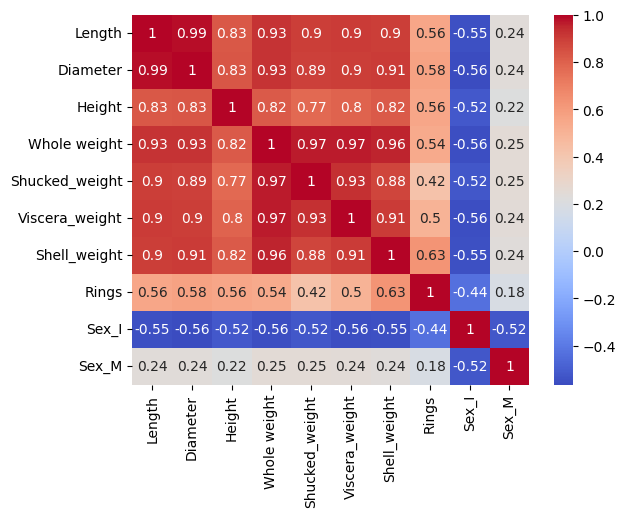

In [13]:
sns.heatmap(encoded_abalone.corr(), cmap='coolwarm', annot=True)
plt.show()

MODELLING

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
encoded_abalone.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

In [16]:
X = encoded_abalone.drop('Rings', axis=1)
y = encoded_abalone['Rings']

In [17]:
#Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regr.predict(X_test)
y_pred

array([11.42442118,  8.30494353,  9.5985229 , 11.87192291, 10.84897491,
       13.82065691, 11.203256  ,  9.42492133,  7.20709072, 10.502373  ,
       10.01577224,  5.76457765,  9.46785635,  7.36544148,  9.37190569,
       12.46807655, 11.93144714, 10.32602253,  9.97294647,  8.65260714,
       17.42978487, 11.5090591 , 10.36262107, 10.67556246,  9.57847046,
        7.53004325,  9.63157371, 10.57239719,  9.97085039,  8.68103459,
       10.38209009, 11.41412399,  7.21178233,  5.98896202,  9.222403  ,
        9.46498866,  6.28774959,  4.78499723,  9.38768147,  6.78814799,
       15.42555209, 18.95166827, 12.2690092 ,  8.64727537, 11.93884961,
       11.72871065, 12.70044049, 10.4603803 ,  9.69344102, 11.28821472,
        7.53727316, 14.18424462,  8.67660887, 13.69300003,  6.67169952,
        9.70566771, 13.16438076, 15.99068343, 11.07961778, 10.59624272,
       11.6145839 ,  8.04301084,  9.79428029,  7.32494308,  9.06620955,
        9.71098752,  5.77499584,  6.50850074,  9.33760504,  9.63

In [20]:
#The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ -1.31967769  12.50038416   9.98698602   8.84406471 -19.41199175
 -10.08111034   8.04815709  -0.7665893    0.08609003]


In [22]:
#The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 4.657540653994066


In [23]:
#The intercept
print('Intercept', regr.intercept_)

Intercept 3.878133143291403
